In [62]:
%matplotlib inline

In [58]:
import os, ast
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib as mpl
from matplotlib import pyplot as plt
import itertools as it
import colorbrewer
import json
import collections
from hs_vervet.tools import hs_pandas as hpd

eu = os.path.expanduser
jn = os.path.join
meta_dir = eu("~/vervet_project/metadata")
var_ana_dir = eu("~/vervet_project/analyses/20150504_163_UnifiedGenotyper/_data")
manuscript_dir = eu("~/VervetPopgen/Manuscript/VervetPopgen_man")
manuscript_dir2 = eu("~/VervetPopgen/Manuscript/VervetPopgen_man_0_2")
man_ana_dir = eu("~/vervet_project/analyses/20150520_popgen_analysis_UG/_data")
xpclr_ana_dir = eu("~/vervet_project/analyses/20150528_UG_xpclr/_data") 
assoc_dir = eu("~/vervet_project/data/gene_associations")
figure_dir = eu("~/VervetPopgen/Figures")
google_xpclr_dir = eu("~/hannes.svardal@gmail.com/Nordborg lab/Vervet monkeys/GMI_vervetpopgen_log/data/xpclr")
vervet_drive_dir = eu("~/Akademisches/Projects/VervetPopgen")
google_man_dir = "/home/GMI/hannes.svardal/hannes.svardal@gmail.com/Nordborg lab/Vervet monkeys/GMI_vervetpopgen_log/manuscript/163_pop_manuscript/"
ballet_dir = eu("~/vervet_project/analyses/20150601_UG_ballet/_data")
pops = ["aet","cyn","pyg","sab","tan"]
colors = json.load(open(jn(meta_dir,'colors.json')))

chrom_len = pd.read_csv(jn(meta_dir,"human_hg38.5_chrom_len.tsv"),sep='\t',usecols=[0,1],squeeze=True,index_col=0)

In [53]:
#reformat chrom_len
#chrom_len = pd.read_csv(jn(meta_dir,"human_hg38.5_chrom_len.tsv"),sep=r"\s*")
#chrom_len["length"] = chrom_len["length"].apply(lambda s: int(s.replace(',', '')))
#chrom_len.to_csv(jn(meta_dir,"human_hg38.5_chrom_len.tsv"),sep='\t',index=False)

In [31]:
from enrichme import enrichme as em
from enrichme import pandas_util as pu
from pypopgen.plot import genomeplot as gp

In [6]:
#human_gene_df = pd.read_csv(eu("~/vervet_project/data/other_species/human/human_gene_positions_hg38.5.tsv"),
#                            sep='\t',names=['chrom','start','end','gene_symbol','ensembl_id'],skiprows=1)
#human_gene_df_chrom = human_gene_df[human_gene_df['chrom'].apply(lambda s: s in [str(i) for i in range(1,24)] + ['X'])]
#human_gene_df_chrom['chrom'] = human_gene_df_chrom['chrom'].apply(lambda s: 'chr'+s)
#human_gene_df_chrom.set_index(['chrom','start'],inplace=True)

In [86]:
human_gene_df_chrom_s = human_gene_df_chrom.reset_index().set_index("gene_symbol")

In [30]:
#human_gene_df_chrom.to_csv(eu("~/vervet_project/data/other_species/human/human_gene_positions_hg38.5_chroms.tsv"),sep='\t')

In [19]:
#go_to_name = pd.read_csv(eu("~/vervet_project/data/other_species/human/gene_associations/go_to_name.tsv"),sep='\t')
#go_to_name.drop_duplicates(inplace=True)
#go_to_name.to_csv(eu("~/vervet_project/data/other_species/human/gene_associations/go_to_name.tsv"),sep='\t',index=False)

In [24]:
ensembl_id_to_go = pd.read_csv(open(eu("~/vervet_project/data/other_species/human/gene_associations/ensembl_id_to_go.tsv"),'r'),
                                  usecols=['Ensembl Gene ID', 'GO Term Accession'],sep='\t')

In [197]:
import re

In [198]:
rod = gwas_s
chrom_ix = rod.index.droplevel(1)
chrom_split = np.array([re.findall('\d+|\D+', s) for s in chrom_ix])

In [199]:
chrom_split[]

array([['chr', '1'], ['chr', '1'], ['chr', '1'], ..., ['chrX'], ['chrX'],
       ['chrX']], dtype=object)

In [25]:
import re
def num_sort_chrom_index(rod):
    chrom_ix = rod.index.droplevel(1)
    chrom_split = np.array([re.findall('\d+|\D+', s) for s in chrom_ix])
    rod.index = pd.MultiIndex.from_arrays([int_chrom,rod.index.droplevel(0)])
    rod.sort_index()
    rod.index = pd.MultiIndex.from_arrays([int_chrom,rod.index.droplevel(0)])

,Ensembl Gene ID,GO Term Accession
0,ENSG00000198888,GO:0005747
1,ENSG00000198888,GO:0005747
2,ENSG00000198888,GO:0044281
3,ENSG00000198888,GO:0005515
4,ENSG00000198888,GO:0022904
5,ENSG00000198888,GO:0008137
6,ENSG00000198888,GO:0006120
7,ENSG00000198888,GO:0005743
8,ENSG00000198888,GO:0031966
9,ENSG00000198888,GO:0044237


## Test different methods with random scores that are in LD

## Denisovan admixture

In [37]:
denisovan_s = pd.read_csv(eu("~/Akademisches/Projects/Enrichme/Test_data/Denisowan_admixture/Denisovan_scores_hannes.bed"), sep="\t",index_col=[0,1],
               usecols=[0,1,3],squeeze=True,header=False,names=["chrom","pos","score"])

In [87]:
human_gene_df_chrom.reset_index().set_index('gene_symbol').ix[['OR1D2','OR2B6']]

,chrom,start,end,ensembl_id
gene_symbol,,,,
OR1D2,chr17,3092058,3092996,ENSG00000184166
OR2B6,chr6,27957241,27958182,ENSG00000124657


In [68]:
with open(eu("~/VervetPopgen/scratch/all_human_genes_enembl.txt"),'w') as f:
    for g in human_gene_df_chrom["ensembl_id"].values:
        f.write(g+'\n')

### define a cutoff

In [38]:
cutoff = 5
top_s = denisovan_s[denisovan_s>cutoff]
candidate_list = pu.get_features(top_s,human_gene_df_chrom,max_dist=5000,feature_name="ensembl_id")
with open(eu("~/VervetPopgen/scratch/denisova_gt_{}.txt".format(cutoff)),'w') as f:
    for g in candidate_list:
        f.write(g+'\n')

In [93]:
np.random.rand()

0.13769536364755341

In [106]:
cutoff = 5
shift = np.random.rand()
print shift
shift_s = em.shift_rod(denisovan_s, np.random.rand())
top_s = shift_s[shift_s>cutoff]
candidate_list = pu.get_features(top_s,human_gene_df_chrom,max_dist=5000,feature_name="ensembl_id")
with open(eu("~/VervetPopgen/scratch/denisova_shift_gt_{}.txt".format(cutoff)),'w') as f:
    for g in candidate_list:
        f.write(g+'\n')

0.345538163364


### define score per gene

In [103]:
denisova_score_per_gene = pu.data_per_feature(denisovan_s,human_gene_df_chrom, feature_name='ensembl_id')

In [79]:
max_per_gene = denisova_score_per_gene.groupby("ensembl_id").max()
mean_per_gene = denisova_score_per_gene.groupby("ensembl_id").mean()

In [84]:
with open(eu("~/VervetPopgen/scratch/human_ranked_by_denisowa_score_max.txt"),'w') as f:
    f.write("\n".join(max_per_gene.sort("score",ascending=False,inplace=False).index)+'\n')

In [85]:
with open(eu("~/VervetPopgen/scratch/human_ranked_by_denisowa_score_mean.txt"),'w') as f:
    f.write("\n".join(mean_per_gene.sort("score",ascending=False,inplace=False).index)+'\n')

## UK 10k GWAS

In [3]:
gwas_s = pd.read_csv(eu("~/Akademisches/Projects/Enrichme/Test_data/human_gwas/HDL.bedGraph"),
                     sep='\t',usecols=[0,1,3],names=['chrom','pos','score'],squeeze=True, index_col=[0,1])

(<matplotlib.figure.Figure at 0xc2bddd0>,
 <matplotlib.gridspec.GridSpecFromSubplotSpec at 0xc2bdd90>)

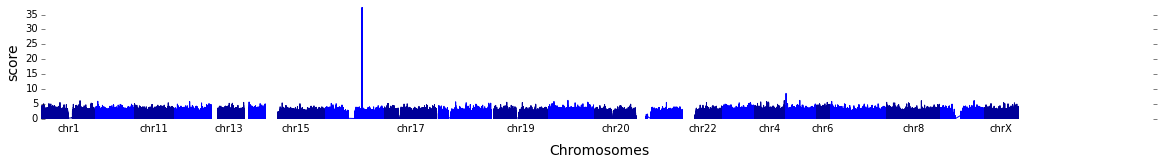

In [63]:
fig = plt.figure(figsize=(16,8))
gp.plot_chrom_series(gwas_s, chrom_len, fig=fig)

In [186]:
tc_s = pd.read_csv(eu("~/Akademisches/Projects/Enrichme/Test_data/human_gwas/TC.tsv"),
                     sep='\t',usecols=[0,1,3],names=['chrom','pos','score'],squeeze=True, index_col=[0,1])

(<matplotlib.figure.Figure at 0x1f71afe10>,
 <matplotlib.gridspec.GridSpecFromSubplotSpec at 0x1f71ad910>)

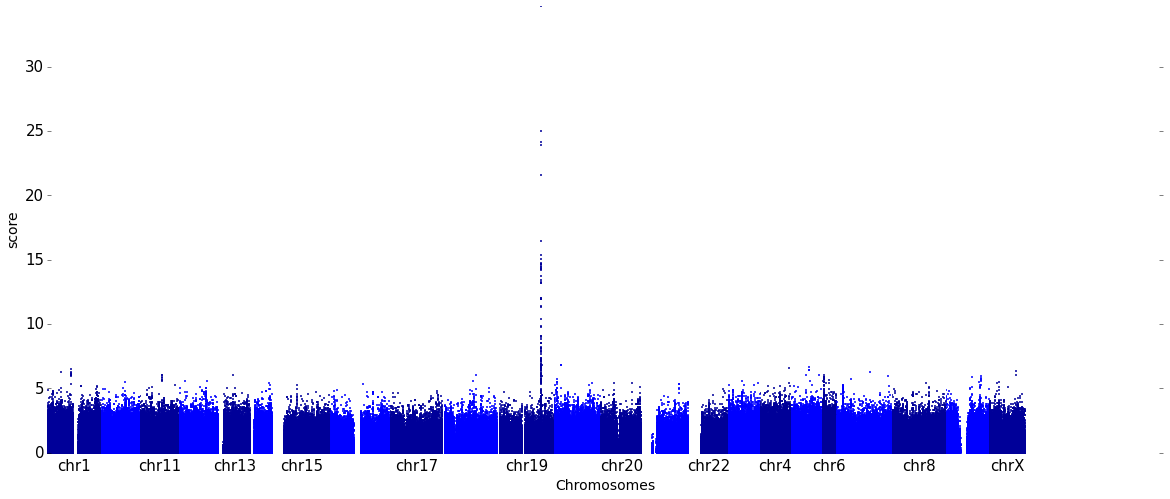

In [187]:
fig = plt.figure(figsize=(20,8))
gp.plot_chrom_series(tc_s, chrom_len,**{"markersize":3})

In [66]:
gwas_s = pd.read_csv(eu("~/Akademisches/Projects/Enrichme/Test_data/human_gwas/LDL.tsv"),
                     sep='\t',usecols=[0,1,3],names=['chrom','pos','score'],index_col=[0,1],squeeze=True )

In [139]:
phenotype = "BMI"
gwas_s = pd.read_csv(eu("~/Akademisches/Projects/Enrichme/Test_data/human_gwas/{}.tsv".format(phenotype)),
                     sep='\t',usecols=[0,1,3],names=['chrom','pos','score'],index_col=[0,1],squeeze=True )

In [133]:
mpl.rcParams['font.size'] = 15

In [173]:
gwas_s_subset = gwas_s.loc[np.random.choice(gwas_s.index, 10**4, replace=False)]

In [177]:
gwas_s_subset = gwas_s_subset.sort_index()

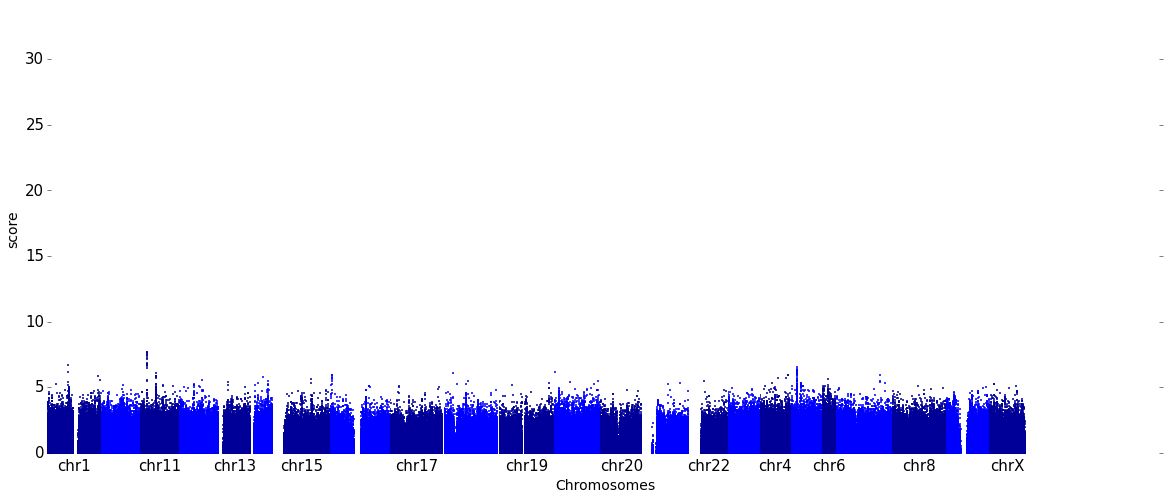

In [185]:
fig = plt.figure(figsize=(20,8))
fig, total_ax, grid = gp.plot_chrom_series(gwas_s,
                                           chrom_len, fig=fig,**{"markersize":3})
for ax in fig.get_axes():
    ax.set_ylim([0,34])

In [75]:
cutoff = 4
top_s = gwas_s[gwas_s>cutoff]
candidate_list = pu.get_features(top_s,human_gene_df_chrom,max_dist=5000,feature_name="ensembl_id")
print len(candidate_list)
with open(eu("~/VervetPopgen/scratch/{}_gt_{}.txt".format(phenotype,cutoff)),'w') as f:
    for g in candidate_list:
        f.write(g+'\n')

548


In [76]:
cutoff = 4
shift = np.random.rand()
print shift
shift_s = em.shift_rod(gwas_s, np.random.rand())
top_s = shift_s[shift_s>cutoff]
candidate_list = pu.get_features(top_s,human_gene_df_chrom,max_dist=5000,feature_name="ensembl_id")
print len(candidate_list)
with open(eu("~/VervetPopgen/scratch/{}_shift_gt_{}.txt".format(phenotype,cutoff)),'w') as f:
    for g in candidate_list:
        f.write(g+'\n')

0.607782921128
551


In [12]:
gwas_score_per_gene = pu.data_per_feature(gwas_s,human_gene_df_chrom, feature_name='ensembl_id')
max_per_gene = gwas_score_per_gene.groupby("ensembl_id").max()
mean_per_gene = gwas_score_per_gene.groupby("ensembl_id").mean()
with open(eu("~/VervetPopgen/scratch/human_ranked_by_{}_score_max.txt".format(phenotype)),'w') as f:
    f.write("\n".join(max_per_gene.sort("score",ascending=False,inplace=False).index)+'\n')
with open(eu("~/VervetPopgen/scratch/human_ranked_by_{}_score_mean.txt".format(phenotype)),'w') as f:
    f.write("\n".join(mean_per_gene.sort("score",ascending=False,inplace=False).index)+'\n')

In [13]:
shift = np.random.rand()
print shift
shift_s = em.shift_rod(gwas_s, np.random.rand())
was_score_per_gene = pu.data_per_feature(shift_s,human_gene_df_chrom, feature_name='ensembl_id')
max_per_gene = gwas_score_per_gene.groupby("ensembl_id").max()
mean_per_gene = gwas_score_per_gene.groupby("ensembl_id").mean()
with open(eu("~/VervetPopgen/scratch/human_ranked_by_hdl_score_shift_max.txt"),'w') as f:
    f.write("\n".join(max_per_gene.sort("score",ascending=False,inplace=False).index)+'\n')
with open(eu("~/VervetPopgen/scratch/human_ranked_by_hdl_score_shift_mean.txt"),'w') as f:
    f.write("\n".join(mean_per_gene.sort("score",ascending=False,inplace=False).index)+'\n')

0.696073040525


In [80]:
olifaction_cand_raw = """OR8H2 - olfactory receptor, family 8, subfamily h, member 2
OR5M3 - olfactory receptor, family 5, subfamily m, member 3
OR5D16 - olfactory receptor, family 5, subfamily d, member 16
OR5D13 - olfactory receptor, family 5, subfamily d, member 13
OR5R1 - olfactory receptor, family 5, subfamily r, member 1
OR5J2 - olfactory receptor, family 5, subfamily j, member 2
OR4C6 - olfactory receptor, family 4, subfamily c, member 6
OR5D14 - olfactory receptor, family 5, subfamily d, member 14
OR5M9 - olfactory receptor, family 5, subfamily m, member 9
OR4C11 - olfactory receptor, family 4, subfamily c, member 11
OR8J3 - olfactory receptor, family 8, subfamily j, member 3
OR5L1 - olfactory receptor, family 5, subfamily l, member 1
OR5D18 - olfactory receptor, family 5, subfamily d, member 18
OR4S2 - olfactory receptor, family 4, subfamily s, member 2
OR4C16 - olfactory receptor, family 4, subfamily c, member 16
OR8K5 - olfactory receptor, family 8, subfamily k, member 5
OR8H3 - olfactory receptor, family 8, subfamily h, member 3
OR5L2 - olfactory receptor, family 5, subfamily l, member 2
OR4C15 - olfactory receptor, family 4, subfamily c, member 15
OR4P4 - olfactory receptor, family 4, subfamily p, member 4
OR8I2 - olfactory receptor, family 8, subfamily i, member 2"""
olifaction_cand =  [s.split()[0] for s in olifaction_cand_raw.split("\n")]

In [193]:
56105018*1./chrom_len["chr11"]

0.41532623415514824

In [87]:
human_gene_df_chrom_s.ix[olifaction_cand]

,chrom,start,end,ensembl_id
gene_symbol,,,,
OR8H2,chr11,56105018,56106055,ENSG00000181767
OR5M3,chr11,56469574,56470497,ENSG00000174937
OR5D16,chr11,55838752,55839738,ENSG00000205029
OR5D13,chr11,55773438,55774382,ENSG00000198877
OR5R1,chr11,56417258,56418232,ENSG00000174942
OR5J2,chr11,56176618,56177556,ENSG00000174957
OR4C6,chr11,55665167,55666096,ENSG00000181903
OR5D14,chr11,55795556,55796500,ENSG00000186113
OR5M9,chr11,56462469,56463401,ENSG00000150269


In [ ]:
fig = plt.figure(figsize=(20,8))
fig, total_ax, grid = gp.plot_chrom_series(gwas_s,
                                           chrom_len, fig=fig,**{"markersize":3})

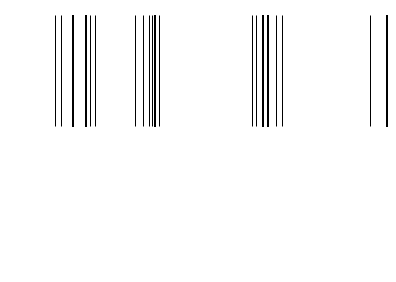

In [191]:
gp.plot_features(human_gene_df_chrom_s.ix[olifaction_cand].reset_index(),annotate=False,feature_name="gene_symbol")

In [89]:
signal_cand_raw = """AGAP1 - arfgap with gtpase domain, ankyrin repeat and ph domain 1
ABI1 - abl-interactor 1
ATP6V0D2 - atpase, h+ transporting, lysosomal 38kda, v0 subunit d2
PAWR - prkc, apoptosis, wt1, regulator
OR4C6 - olfactory receptor, family 4, subfamily c, member 6
OR5D14 - olfactory receptor, family 5, subfamily d, member 14
ANTXR1 - anthrax toxin receptor 1
OR4C11 - olfactory receptor, family 4, subfamily c, member 11
LRP12 - low density lipoprotein receptor-related protein 12
OR4S2 - olfactory receptor, family 4, subfamily s, member 2
TAOK1 - tao kinase 1
OR4C16 - olfactory receptor, family 4, subfamily c, member 16
CARD11 - caspase recruitment domain family, member 11
STK39 - serine threonine kinase 39
DKK2 - dickkopf wnt signaling pathway inhibitor 2
OR4C15 - olfactory receptor, family 4, subfamily c, member 15
TSPAN8 - tetraspanin 8
FOXO3 - forkhead box o3
OR4P4 - olfactory receptor, family 4, subfamily p, member 4
OR8I2 - olfactory receptor, family 8, subfamily i, member 2
SPPL3 - signal peptide peptidase like 3
PPP3CA - protein phosphatase 3, catalytic subunit, alpha isozyme
NCALD - neurocalcin delta
FMN2 - formin 2
GABRA2 - gamma-aminobutyric acid (gaba) a receptor, alpha 2
OR8J3 - olfactory receptor, family 8, subfamily j, member 3
MAP3K19 - mitogen-activated protein kinase kinase kinase 19
ZNF536 - zinc finger protein 536
RGS12 - regulator of g-protein signaling 12
DEK - dek oncogene
RAB40C - rab40c, member ras oncogene family
ANKS1A - ankyrin repeat and sterile alpha motif domain containing 1a
TNFAIP8L3 - tumor necrosis factor, alpha-induced protein 8-like 3
PAK3 - p21 protein (cdc42/rac)-activated kinase 3
DGKD - diacylglycerol kinase, delta 130kda
MC2R - melanocortin 2 receptor (adrenocorticotropic hormone)
LSM14A - lsm14a, scd6 homolog a (s. cerevisiae)
PAQR5 - progestin and adipoq receptor family member v
OR8H2 - olfactory receptor, family 8, subfamily h, member 2
OR5D16 - olfactory receptor, family 5, subfamily d, member 16
ARL3 - adp-ribosylation factor-like 3
CRKL - v-crk avian sarcoma virus ct10 oncogene homolog-like
OR5D13 - olfactory receptor, family 5, subfamily d, member 13
OR5J2 - olfactory receptor, family 5, subfamily j, member 2
OR5M9 - olfactory receptor, family 5, subfamily m, member 9
FGF12 - fibroblast growth factor 12
ACVRL1 - activin a receptor type ii-like 1
PLCD4 - phospholipase c, delta 4
OR8H3 - olfactory receptor, family 8, subfamily h, member 3
BTG2 - btg family, member 2
ESR2 - estrogen receptor 2 (er beta)
ARF5 - adp-ribosylation factor 5
NRXN3 - neurexin 3
MAP2K5 - mitogen-activated protein kinase kinase 5
TENM4 - teneurin transmembrane protein 4
TNFSF9 - tumor necrosis factor (ligand) superfamily, member 9
PLAA - phospholipase a2-activating protein
DCLK1 - doublecortin-like kinase 1
CPNE3 - copine iii
TCF7L1 - transcription factor 7-like 1 (t-cell specific, hmg-box)
PPARD - peroxisome proliferator-activated receptor delta
OR5M3 - olfactory receptor, family 5, subfamily m, member 3
NGEF - neuronal guanine nucleotide exchange factor
OR5R1 - olfactory receptor, family 5, subfamily r, member 1
POMC - proopiomelanocortin
IGF1R - insulin-like growth factor 1 receptor
TNIK - traf2 and nck interacting kinase
EPHB4 - eph receptor b4
OR5L1 - olfactory receptor, family 5, subfamily l, member 1
OR5D18 - olfactory receptor, family 5, subfamily d, member 18
GNAQ - guanine nucleotide binding protein (g protein), q polypeptide
OR8K5 - olfactory receptor, family 8, subfamily k, member 5
CNTN6 - contactin 6
GREM2 - gremlin 2, dan family bmp antagonist
OR5L2 - olfactory receptor, family 5, subfamily l, member 2
RBM14 - rna binding motif protein 14
CABIN1 - calcineurin binding protein 1
TSPAN13 - tetraspanin 13
GRM5 - glutamate receptor, metabotropic 5
KCNH1 - potassium voltage-gated channel, subfamily h (eag-related), member 1
GSK3B - glycogen synthase kinase 3 beta
GMDS - gdp-mannose 4,6-dehydratase"""
signal_cand =  [s.split()[0] for s in sigal_cand_raw.split("\n")]

In [93]:
human_gene_df_chrom_s["length"] =  human_gene_df_chrom_s["end"] - human_gene_df_chrom_s["start"]

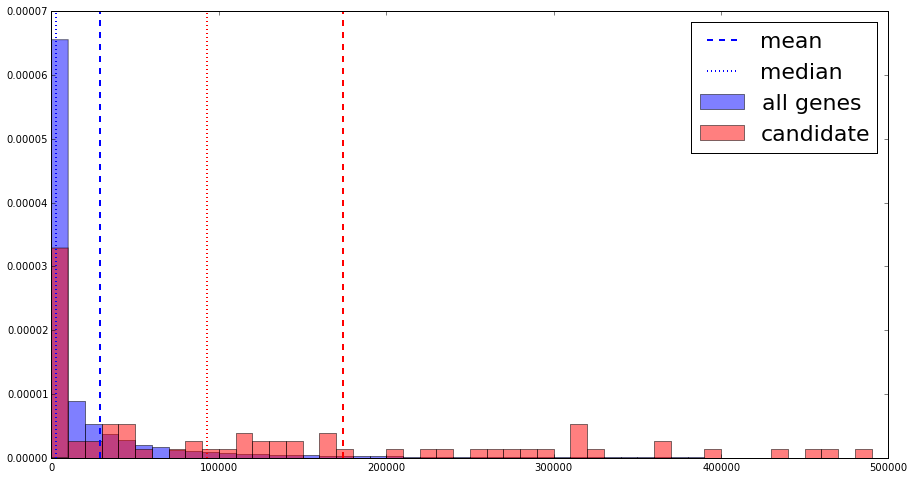

In [125]:
fig = plt.figure(figsize=(15,8))
ax = plt.gca()
bins = np.arange(0,500000,10000)
plt.hist(human_gene_df_chrom_s["length"],bins=bins,alpha=0.5,normed=True,label="all genes")
#ax.set_xlim([0,300000])
plt.axvline(human_gene_df_chrom_s["length"].mean(), color='b', linestyle='dashed', linewidth=2,label="mean")
plt.axvline(human_gene_df_chrom_s["length"].median(), color='b', linestyle='dotted', linewidth=2,label="median")

plt.hist(human_gene_df_chrom_s.ix[signal_cand]["length"],bins=bins,alpha=0.5,normed=True,color='r',label="candidate")
plt.axvline(human_gene_df_chrom_s.ix[signal_cand]["length"].mean(), color='r', linestyle='dashed', linewidth=2, )
plt.axvline(human_gene_df_chrom_s.ix[signal_cand]["length"].median(), color='r', linestyle='dotted', linewidth=2)
plt.legend(fontsize=22)
#plt.title("gene length distribution",)

In [102]:
plt.hist?